In [5]:
import pandas as pd

In [94]:
import pandas as pd

file_path = "D:\Myntra Clothing Reviews -- NLP.csv"
myntra = pd.read_csv(file_path, sep=None, engine="python")

print(myntra.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing.ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review.Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended.IND          23486 non-null  int64 
 7   Positive.Feedback.Count  23486 non-null  int64 
 8   Division.Name            23472 non-null  object
 9   Department.Name          23472 non-null  object
 10  Class.Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None


In [95]:
myntra.head()

,Unnamed: 0,Clothing.ID,Age,Title,Review.Text,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,Class.Name
0,1,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,2,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,3,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,4,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,5,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [96]:
myntra.shape

(23486, 11)

In [97]:
data = pd.DataFrame(myntra['Review.Text'])
data.head()

,Review.Text
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...


In [98]:
len(data)

23486

In [99]:
data.iloc[500,0]

"I really like the style of this top, and it's delicate but well made, but i wish it were longer and less boxy. it's nice that it comes with a separate cami to layer, but the cami is very cropped. when i raise my arms you can see a lot of midriff (and the top is see through so a layer underneath is necessary). a longer cami probably wouldn't work because the top is also very short. i'm 5'0'' with an average torso length, and ordered the xxs petite. also, you would have to cut the tag off if you d"

### Converted to Lower

In [100]:
data['Review.Text'] = data['Review.Text'].str.lower()

In [101]:
data.iloc[500,0]

"i really like the style of this top, and it's delicate but well made, but i wish it were longer and less boxy. it's nice that it comes with a separate cami to layer, but the cami is very cropped. when i raise my arms you can see a lot of midriff (and the top is see through so a layer underneath is necessary). a longer cami probably wouldn't work because the top is also very short. i'm 5'0'' with an average torso length, and ordered the xxs petite. also, you would have to cut the tag off if you d"

### Removing Url

In [102]:
data['Review.Text'] = data['Review.Text'].replace(r'http\S+,www\S+','', regex=True)

In [103]:
data.isna().sum()

Review.Text    845
dtype: int64

### Hanling Missing values

In [104]:
if 'Review.Text' in data.columns:
    data['Review.Text'] = data['Review.Text'].fillna('')  # Replace NaN with empty strings
    data['Review.Text'] = data['Review.Text'].apply(remove_punctuation)
else:
    print("Column 'Review.Text' not found. Check column names.")

In [105]:
data.isna().sum()

Review.Text    0
dtype: int64

### Remove punctuation

In [106]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [107]:
def remove_punctuation(abc):
    text_nopunct = ''.join([c 
                           for c in abc 
                           if c not in string.punctuation])
    return text_nopunct

In [108]:
data['Review.Text'] = data['Review.Text'].apply(lambda x : remove_punctuation(x))

In [109]:
data.iloc[500,0]

'i really like the style of this top and its delicate but well made but i wish it were longer and less boxy its nice that it comes with a separate cami to layer but the cami is very cropped when i raise my arms you can see a lot of midriff and the top is see through so a layer underneath is necessary a longer cami probably wouldnt work because the top is also very short im 50 with an average torso length and ordered the xxs petite also you would have to cut the tag off if you d'

### Remove Number

In [110]:
data['Review.Text'] = data['Review.Text'].replace(r'\d+','',regex= True)

In [111]:
data.iloc[500,0]

'i really like the style of this top and its delicate but well made but i wish it were longer and less boxy its nice that it comes with a separate cami to layer but the cami is very cropped when i raise my arms you can see a lot of midriff and the top is see through so a layer underneath is necessary a longer cami probably wouldnt work because the top is also very short im  with an average torso length and ordered the xxs petite also you would have to cut the tag off if you d'

### Removing Stop Words

In [112]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
from nltk.corpus import stopwords
stop = stopwords.words('English')

print("No.of StopWords :",len(stop))
stop

No.of StopWords : 198


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [114]:
data.iloc[991,0]

'best jeans ever its so hard to find a good petite jean you shop and shiop and then pay  more to get them altered the fit and length on these are perfect love love love'

In [115]:
data['Review.Text'] = data['Review.Text'].apply(lambda x : ' '.join([c
                                                                    for c in x.split()
                                                                    if c not in (stop)]))

In [116]:
data.iloc[991,0]

'best jeans ever hard find good petite jean shop shiop pay get altered fit length perfect love love love'

### Common Words

In [117]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [118]:
import re

In [119]:
def clean_text_round2(text):
    text =  re.sub('im|really|dress|like|wear|back', '', text) #remove delhipolice
    text =  re.sub('make|buy|try|order', '', text) #remove delhipolice
    text =  re.sub('think|small|little|go|one|well','', text) #remove farmers
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you word tokens 
                    if w.lower() in words)  # dictionary     
    return text

In [120]:
# Let's take a look at the updated text
data = pd.DataFrame(data['Review.Text'].apply(lambda x: clean_text_round2(x)))
data.iloc[991,0]

'best jeans ever hard find od petite jean shop pay get fit length perfect love love love'

### Lemmatization

In [121]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [122]:
lemmatizer = WordNetLemmatizer() # lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  # word tokenizer 

In [123]:
def lemmatize_text(abc):
    return [lemmatizer.lemmatize(w,"v") ## v = verb   = arrest
            for w in w_tokenizer.tokenize(abc)]  # word tokenizer  w = arresting

In [124]:
data.iloc[999,0]

'collar grace kelly pull oversized hood lightweight cozy piece everything love sweater coat'

In [125]:
data['Review.Text'] = data['Review.Text'].apply(lambda x :' '.join(lemmatize_text(x)))  # text = x
data.iloc[991,0]

'best jeans ever hard find od petite jean shop pay get fit length perfect love love love'

### Strip extra whitespace

In [126]:
data['Review.Text'] = data['Review.Text'].str.rstrip()
data.iloc[991,0]

'best jeans ever hard find od petite jean shop pay get fit length perfect love love love'

### Removing Duplicate Row

In [127]:
data.head()

,Review.Text
0,absolutely wonderful silky sexy comfortable
1,love pretty find store glad never would petite...
2,high work initially petite usual size find out...
3,love love love fun flirty fabulous every te ge...
4,shirt flatter due adjustable front tie perfect...


In [128]:
data = data.drop_duplicates()
data.shape

(22622, 1)

In [129]:
data_copy = data.copy

# Document-Term Matrix

In [47]:
from sklearn.feature_extraction.text import  CountVectorizer

In [48]:
cv = CountVectorizer(stop_words='english') # dtm = Term
data_cv = cv.fit_transform(data['Review.Text'])  # Term & Count
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # document term matrix
tdm = data_dtm.transpose()
tdm

,0,1,2,3,4,5,6,7,8,9,...,22612,22613,22614,22615,22616,22617,22618,22619,22620,22621
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdomen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdominal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abhor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zigzag,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zip,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zipper,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zombie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,22613,22614,22615,22616,22617,22618,22619,22620,22621,freq
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
abbey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
abdomen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
abdominal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abhor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,22613,22614,22615,22616,22617,22618,22619,22620,22621,freq
0,aa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
1,abbey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,abdomen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,abdominal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,abhor,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


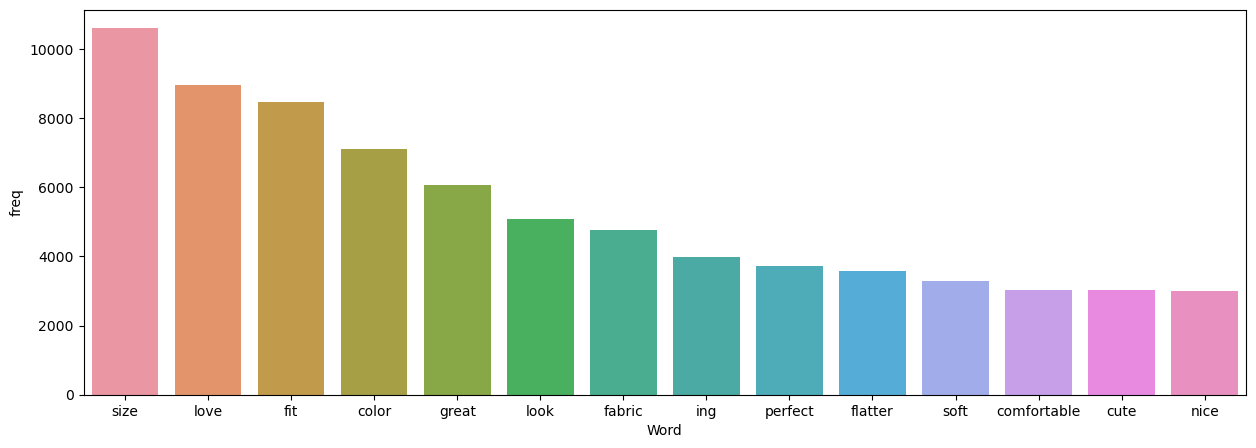

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5))
fg = sns.barplot(x='Word', y='freq',data=w)

In [51]:
tdm1 = tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

C:\Users\rajat\AppData\Local\Temp\ipykernel_5328\3873718423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.rename(columns = {'index':'Word'}, inplace = True)
C:\Users\rajat\AppData\Local\Temp\ipykernel_5328\3873718423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True)


,Word,freq
4704,size,10610
2961,love,8960
1939,fit,8466
965,color,7123
2257,great,6076
...,...,...
987,commercial,1
2896,lilt,1
4543,sensational,1
499,blind,1


### Barplot

In [52]:
w = tdm1[tdm1['freq'] >3000]
w

,Word,freq
4704,size,10610
2961,love,8960
1939,fit,8466
965,color,7123
2257,great,6076
2941,look,5098
1808,fabric,4756
2584,ing,3973
3675,perfect,3731
1961,flatter,3590


In [54]:
text = " ".join(review for review in data['Review.Text'])
print ("There are {} words in the combination of all review.".format(len(data['Review.Text'])))

There are 22622 words in the combination of all review.


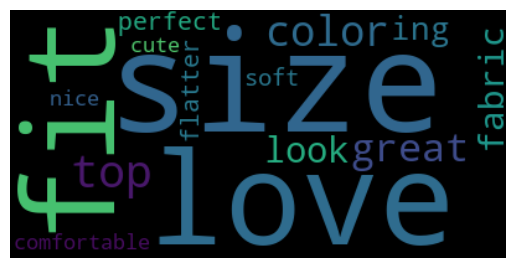

In [55]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

abc = WordCloud(stopwords=set(STOPWORDS),
                      background_color="black",
                      collocations=False,
                      mode="RGBA",  # r = red , g = green , b = blue
                      max_words=15).generate(text)


plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

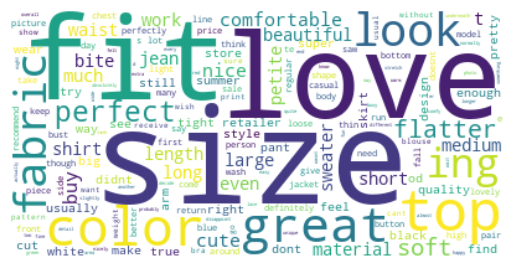

In [56]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
abc = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                      mode="RGBA",
                      max_words=15224).generate(text)

plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

In [57]:
from textblob import TextBlob

In [58]:
data['polarity'] = data['Review.Text'].apply(lambda x: TextBlob(x).sentiment.polarity) # polarity range -1 to +1
data.head(5)

,Review.Text,polarity
0,absolutely wonderful silky sexy comfortable,0.633333
1,love pretty find store glad never would petite...,0.420000
2,high work initially petite usual size find out...,0.047811
3,love love love fun flirty fabulous every te ge...,0.500000
4,shirt flatter due adjustable front tie perfect...,0.458333


In [59]:
import numpy as np

In [60]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data

,Review.Text,polarity,Sentiment
0,absolutely wonderful silky sexy comfortable,0.633333,Positive
1,love pretty find store glad never would petite...,0.420000,Positive
2,high work initially petite usual size find out...,0.047811,Positive
3,love love love fun flirty fabulous every te ge...,0.500000,Positive
4,shirt flatter due adjustable front tie perfect...,0.458333,Positive
...,...,...,...
23481,happy snag great price easy slip flatter cut c...,0.677778,Positive
23482,maternity clothe soft stretchy shiny material ...,0.130000,Positive
23483,fit top see never would work glad able store d...,0.450000,Positive
23484,buy wed summer cute unfortunately fit perfect ...,0.418750,Positive


### Sentiment Analysis  =  95% positive reviews

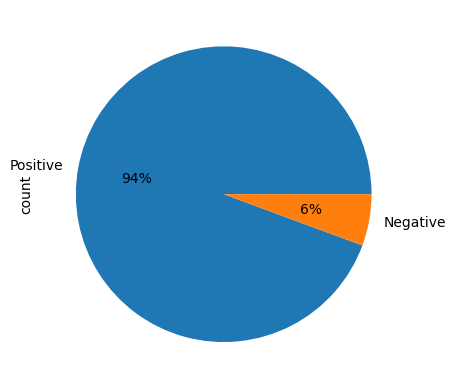

In [61]:
data.Sentiment.value_counts().plot.pie(autopct="%0.0f%%");

# TF-IDF Matrix 

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vectorizer = TfidfVectorizer(use_idf=True,stop_words='english',analyzer='word') 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(data['Review.Text'])
feature_names = cv.get_feature_names_out()  ## EVERY WORD NAME
abc = tfidf_vectorizer_vectors.transpose()

In [63]:
output=pd.DataFrame.sparse.from_spmatrix(abc,index=feature_names)
output.reset_index(inplace=True)
output.rename(columns = {'index':'Word'}, inplace = True) # RENAMING
output

,Word,0,1,2,3,4,5,6,7,8,...,22612,22613,22614,22615,22616,22617,22618,22619,22620,22621
0,aa,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abbey,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abdomen,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abdominal,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,abhor,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,zigzag,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6036,zip,0.0,0.0,0.168184,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,zipper,0.0,0.0,0.150174,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,zombie,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.DataFrame({'Review': [
    "Great product, loved it!", 
    "Bad quality, not recommended", 
    "Excellent fabric and fit!", 
    "Nice design but poor material quality.", 
    "Amazing fit and good color!"
]})

tfidf = TfidfVectorizer(stop_words='english', norm=None)
X_tfidf = tfidf.fit_transform(df['Review'])  # Sparse matrix

words = tfidf.get_feature_names_out()
tfidf_values = X_tfidf.max(axis=0).toarray().flatten()

output = pd.DataFrame({'Word': words, 'TF*IDF': tfidf_values})

output.sort_values(by='TF*IDF', ascending=False, inplace=True)

print(output.head(20))


           Word    TF*IDF
0       amazing  2.098612
1           bad  2.098612
2         color  2.098612
3        design  2.098612
4     excellent  2.098612
5        fabric  2.098612
7          good  2.098612
8         great  2.098612
9         loved  2.098612
10     material  2.098612
11         nice  2.098612
12         poor  2.098612
13      product  2.098612
15  recommended  2.098612
6           fit  1.693147
14      quality  1.693147


In [65]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans

In [66]:
X = tfidf.fit_transform(data['Review.Text'])

In [67]:
cosine_sim = cosine_similarity(X)

In [70]:
from sklearn.cluster import KMeans

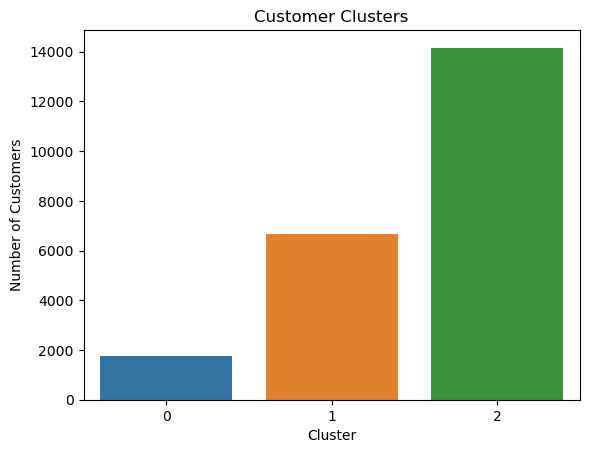

In [89]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
data['Cluster_KMeans'] = kmeans.fit_predict(X)  
sns.countplot(x=data['Cluster_KMeans'])
plt.title("Customer Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

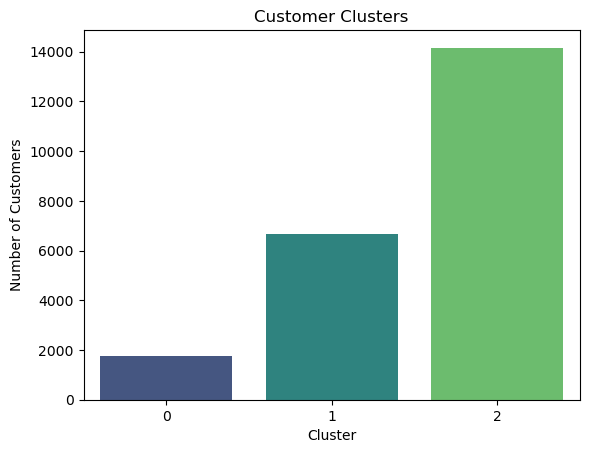

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['Cluster_KMeans'], palette="viridis")
plt.title("Customer Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()


# Model Building

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [92]:
data

,Review.Text,polarity,Sentiment,Cluster_KMeans,PCA1,PCA2
0,absolutely wonderful silky sexy comfortable,0.633333,Positive,2,-2.653405,-1.337607
1,love pretty find store glad never would petite...,0.420000,Positive,1,1.449348,0.483693
2,high work initially petite usual size find out...,0.047811,Positive,1,3.237492,-1.681217
3,love love love fun flirty fabulous every te ge...,0.500000,Positive,2,-2.792194,0.763598
4,shirt flatter due adjustable front tie perfect...,0.458333,Positive,2,-2.136386,-0.477110
...,...,...,...,...,...,...
23481,happy snag great price easy slip flatter cut c...,0.677778,Positive,2,-2.339526,-0.259528
23482,maternity clothe soft stretchy shiny material ...,0.130000,Positive,2,-1.222195,-0.684646
23483,fit top see never would work glad able store d...,0.450000,Positive,2,-0.783213,-0.662588
23484,buy wed summer cute unfortunately fit perfect ...,0.418750,Positive,1,1.217471,-0.347958


In [93]:
myntra

,Unnamed: 0,Clothing.ID,Age,Title,Review.Text,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,Class.Name
0,1,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,2,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,3,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,4,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,5,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23482,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23483,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23484,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23485,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [131]:
myntra = myntra[['Review.Text','Rating']]

In [132]:
myntra

,Review.Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5
...,...,...
23481,I was very happy to snag this dress at such a ...,5
23482,"It reminds me of maternity clothes. soft, stre...",3
23483,"This fit well, but the top was very see throug...",3
23484,I bought this dress for a wedding i have this ...,3


In [133]:
myntra = myntra.dropna()

In [136]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [137]:
def clean_text(text):
    if isinstance(text, str):  
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
        return text
    return ""

In [140]:
myntra['Cleaned_Review'] = myntra['Review.Text'].apply(clean_text)

In [141]:
import warnings
warnings.filterwarnings('ignore')

In [143]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(myntra['Cleaned_Review'])
y = myntra['Rating']  # Target variable

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [147]:
y_pred = model.predict(X_test)

In [149]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 58.36%

Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.03      0.05       148
           2       0.40      0.02      0.04       309
           3       0.43      0.13      0.20       588
           4       0.24      0.04      0.06       939
           5       0.60      0.99      0.75      2545

    accuracy                           0.58      4529
   macro avg       0.45      0.24      0.22      4529
weighted avg       0.49      0.58      0.46      4529



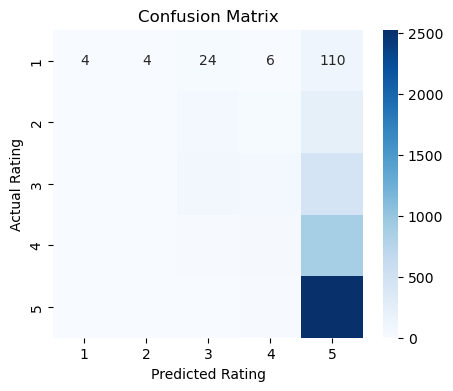

In [150]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d", xticklabels=range(1, 6), yticklabels=range(1, 6))
plt.xlabel("Predicted Rating")
plt.ylabel("Actual Rating")
plt.title("Confusion Matrix")
plt.show()

In [151]:
rf = RandomForestClassifier(random_state=42)

In [152]:
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees
    'max_depth': [10, 20, 30],            # Maximum depth of trees
    'min_samples_split': [2, 5, 10],      # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples per leaf
    'criterion': ['gini', 'entropy']      # Splitting criterion
}

In [154]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)  # Train with GridSearch

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [156]:
best_rf = grid_search.best_estimator_

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test data
accuracy = best_rf.score(X_test, y_test)

Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [157]:
print("Test Accuracy:", accuracy)

Test Accuracy: 0.5630381982777655


In [159]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [164]:
from imblearn.over_sampling import SMOTE

# Building model With Hypertuning Parameter and SMOTE

In [182]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if isinstance(text, float):  # Handle NaN values
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Apply Cleaning
data['Review.Text'] = data['Review.Text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [188]:
df = pd.read_csv(file_path, delimiter=";", encoding="utf-8", on_bad_lines="skip")

In [189]:
df

,Unnamed: 0,Clothing.ID,Age,Title,Review.Text,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,Class.Name
0,1,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,2,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,3,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,4,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,5,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23482,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23483,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23484,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23485,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [223]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [227]:
try:
    df = pd.read_csv(file_path, delimiter=";", encoding="utf-8", on_bad_lines="skip")
except:
    df = pd.read_csv(file_path, error_bad_lines=False, encoding="utf-8")

In [228]:
df

,Unnamed: 0,Clothing.ID,Age,Title,Review.Text,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,Class.Name
0,1,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,2,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,3,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,4,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,5,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23482,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23483,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23484,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23485,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [229]:
df.Rating.value_counts()

Rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

In [230]:
df = df[['Review.Text', 'Rating']].dropna()

In [232]:
print("Original unique ratings:", df['Rating'].unique())

Original unique ratings: [4 5 3 2 1]


In [233]:
df = df[df['Rating'].isin([1, 2, 3, 4, 5])] 
df['Rating'] = df['Rating'].astype(int) 

In [234]:
print("Unique ratings after filtering:", df['Rating'].unique())  

Unique ratings after filtering: [4 5 3 2 1]


In [235]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [236]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

In [237]:
df['Cleaned_Review'] = df['Review.Text'].astype(str).apply(clean_text)

In [238]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['Cleaned_Review'])
y = df['Rating'].values 

In [239]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [240]:
print("Unique ratings after SMOTE:", np.unique(y_resampled))  

Unique ratings after SMOTE: [1 2 3 4 5]


In [241]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [242]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5]
}

In [243]:
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 300, 500]},
             verbose=2)

In [244]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [245]:
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Final Model Accuracy:", accuracy)


✅ Final Model Accuracy: 0.8837320574162679


In [246]:
report = classification_report(y_test, y_pred, target_names=['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'])
print("\n📊 Classification Report:\n", report)


📊 Classification Report:
               precision    recall  f1-score   support

      1 Star       1.00      0.98      0.99      2480
     2 Stars       0.98      0.96      0.97      2571
     3 Stars       0.93      0.89      0.91      2463
     4 Stars       0.87      0.67      0.76      2570
     5 Stars       0.69      0.91      0.79      2456

    accuracy                           0.88     12540
   macro avg       0.90      0.88      0.88     12540
weighted avg       0.90      0.88      0.88     12540



## Therefore the accuracy of the model is 88%, hence it is a great fit.